In [1]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint
from numpy.linalg import norm
from pylab import *
import pylab as p
from scipy import integrate
matplotlib.rcParams['text.usetex'] = True

In [2]:
r1=3;K1=4;alpha21=1.5;r2=0.5;K2=2;alpha12=0.8
def f(x,y):
    f=r1*x*(1-(x+alpha21*y)/K1)
    return f
def g(x,y):
    g=r2*y*(1-(y+alpha12*x)/K2)
    return g

In [3]:
def dX_dt(X, t=0):
    return array([f(X[0],X[1]),g(X[0],X[1])])
t = linspace(0, 60,  500)              # time
X0 = array([4, 3]) 
X=integrate.odeint(dX_dt, X0, t)
  

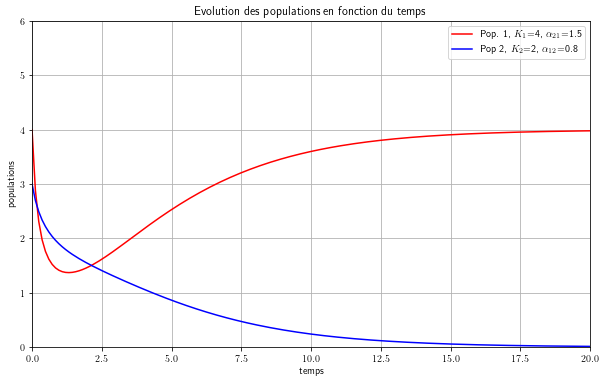

In [4]:
rabbits, foxes = X.T
f1 = p.figure(figsize=(10,6))
plt.plot(t, rabbits, 'r-', label=r'Pop. 1, $K_1$=%.f, $\alpha_{21}$=%.1f '%(K1, alpha21))
plt.plot(t, foxes  , 'b-', label=r'Pop 2, $K_2$=%.f, $\alpha_{12}$=%.1f '%(K2,alpha12))
plt.grid()
plt.legend(loc='best')
plt.xlabel('temps')
plt.ylabel('populations')
plt.xlim(0,20)
plt.ylim(0,6)
plt.title('Evolution des populations en fonction du temps')
f1.savefig('graphesFonctionsPop1>Pop2.pdf')

L'espace des phases avec les points fixes, les isoclines, le champ de vecteurs.


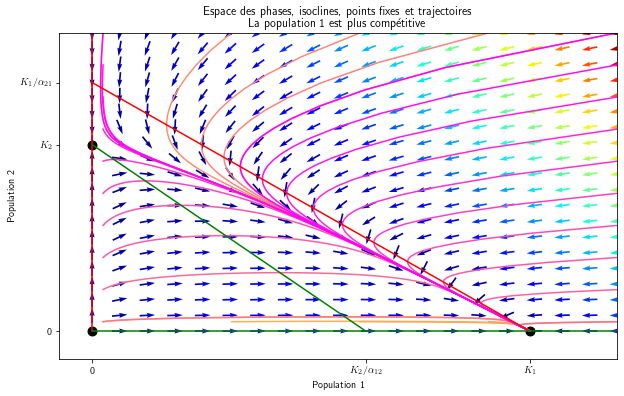

In [8]:

xinter=(K1-alpha21*K2)/(1-alpha12*alpha21)
yinter=(K2-alpha12*K1)/(1-alpha12*alpha21)
xmax=1.2*max(K1,K2/alpha12)
ymax=1.2*max(K2,K1/alpha21)
Grille1=array(meshgrid(linspace(0.1, xmax, 5),linspace(0.1, ymax, 2) )).reshape(2,-1).T
Grille2=array(meshgrid(linspace(0.1,xmax,2),linspace(0.1,ymax,10))).reshape(2,-1).T
Grille=np.append(Grille1,Grille2,axis=0)
vcolors = p.cm.spring_r(linspace(0.3, 1., len(Grille)))  # colors for each trajectory

f2 = plt.figure(figsize=(10,6))
#-------------------------------------------------------
# plot trajectories 
for v, col in zip(Grille, vcolors):
    X0 = v                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    plt.plot( X[:,0], X[:,1], lw=1.5, color=col )

#-Les deux trajectoires séparantes dans le cas equi------------------------------------------------------
if K1>K2/alpha12 and K2>K1/alpha21:
    X = integrate.odeint(dX_dt, array([0.01,0.01*yinter/xinter]),t)         # we don't need infodict here
    plt.plot(X[:,0], X[:,1], lw=2, color='blue')
    X = integrate.odeint(dX_dt, array([7.2,7.2*yinter/xinter]),t)         # we don't need infodict here
    plt.plot(X[:,0], X[:,1], lw=2, color='blue')
# define a grid and compute direction at each point

nb_points   = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Espace des phases, isoclines, points fixes et trajectoires\n La population 1 est plus compétitive')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
plt.plot([K1,0],[0,K1/alpha21],'red')
plt.plot([0,0],[0,ymax],'red')
plt.plot([K2/alpha12,0],[0,K2],'green')
plt.plot([0,xmax],[0,0],'green')
plt.scatter(0,0,c='black',s=80)
plt.scatter(0,K2,c='black',s=80)
plt.scatter(K1,0,c='black',s=80)
if xinter>=0 and yinter>=0:
    plt.scatter(xinter,yinter,c='black',s=80)
plt.xlabel('Population 1')
plt.ylabel('Population 2')
plt.xticks([0,K1,K2/alpha12],['0',r'$K_1$',r'$K_2/\alpha_{12}$'])
plt.yticks([0,K2,K1/alpha21],['0',r'$K_2$',r'$K_1/\alpha_{21}$'])
plt.xlim(-0.3, xmax)
plt.ylim(-0.3, ymax)
f2.savefig('phasesCompetitif1>2.pdf')

In [6]:
print(matplotlib.rcParams['text.usetex'])

True
